## Explore LDSim GPU data via Jupyter notebook

#### This notebook is relient on several free and open-source python packages, such as [leafmap](https://leafmap.org), [ipyleaflet](https://ipyleaflet.readthedocs.io/en/latest/), [GeoPandas](https://geopandas.org/en/stable/), [Fiona](https://pypi.org/project/Fiona/), [Rasterio](https://rasterio.readthedocs.io/en/stable/), and [matplotlib](https://matplotlib.org/) that each contribute different tools in Python that empower users to do interactive mapping, geospatial analysis, and data visualization within a Jupyter notebook. Leafmap is a python package that enables geospatial analysis and interactive mapping within a Jupyter environment. Leafmap is built off of several other open-source packages, such as ipyleaflet which enables complex interactive mapping, WhiteboxTools and whiteboxgui, which allow for complex geospatial analysis, and ipywidgets for designing interactive graphical user interfaces [GUIs]). 

**<span style="color:red">NOTE: Many of these tools will need ample time to run depending on contributing factors such as the complexity of the data package, network speed, and server load.</span>**

Begin by installing both packages: [leafmap](https://leafmap.org)  and [GeoPandas](https://geopandas.org/en/stable/).

**Note:** If you already have leafmap and geopandas installed, comment out the code below by adding "#" in front of each line. 
`# !pip install leafmap`

In [3]:
#!pip install leafmap
#!pip install geopandas
#!pip install mapclassify
#!pip install topojson
!pip install chart_studio 

##### Make sure that leafmap package is up-to-date:

In [2]:
#leafmap.update_package()

##### Import the packages:

In [4]:
import leafmap
from leafmap import leafmap
import leafmap.colormaps as cm
import pandas as pd
import geopandas as gpd
import fiona
import rasterio
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify as mpcl
import topojson as tp
from shapely import geometry
import numpy
import json
import plotly.express as px
import pyproj

##### Use GeoPandas to read the LDSim **GPU** [FlatGeobuf](https://flatgeobuf.org/) data layer from VPDC HTTPS URL and return it as a [GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html).

In [5]:
yuba_gpu = gpd.read_file(
    "https://storage.googleapis.com/way-find.com/vpdc/data/LDSim/region/Yuba/ldsim_outputs/yuba_gpu.fgb"
)

##### Use [TopoJson](https://pypi.org/project/topojson/1.0rc4/) to simplify the yuba's geometry in order to speed up rendering 

**<span style="color:red">WARNING: Only use the simplified geodataframe for visualizing the data. Any spatial analysis, such as determining the area of polygons, etc. should be done with the original "yuba_gpu" above.</span>**

In [8]:
topo = tp.Topology(yuba_gpu.to_crs({'init':'epsg:3857'}), prequantize=False)
yuba_gpu_smpl = topo.toposimplify(1).to_gdf()

### Review the hosted LDSim GPU data for the Yuba region

##### Visualize the GPU data by creating a static plot 

<AxesSubplot: >

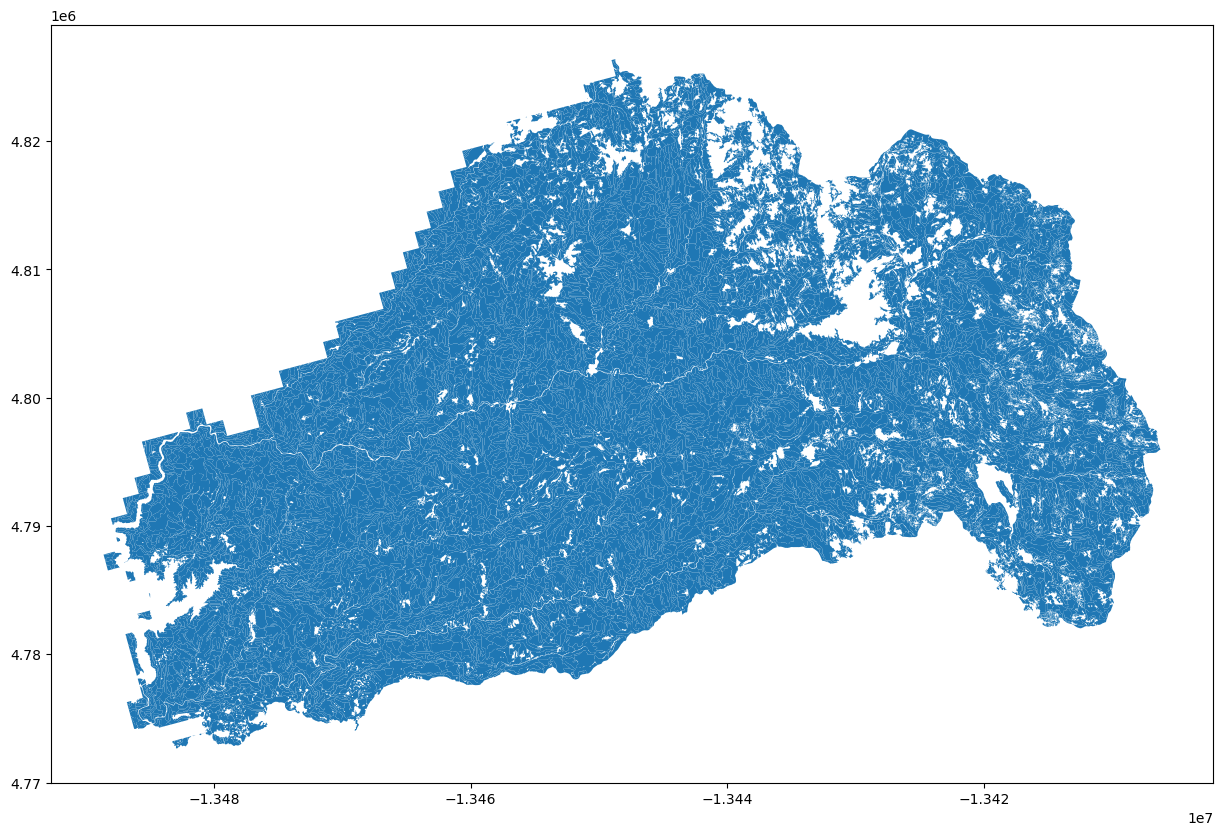

In [9]:
yuba_gpu_smpl.plot(figsize=(15, 10))

##### Examine the Yuba gpu associated attribute data

In [10]:
yuba_gpu_smpl.head()

,geometry,id,areaHa,areaAcres,elevWestCL,slopeCL,aspectCL,sriCL,tpiCL,twiCL,...,treeQmdDI,treeQmdDSN,treeQmdDSA,stageDSN,stageDSA,sizeDSN,sizeDSA,CompDSN,CompDSA,lyr1
0,"MULTIPOLYGON (((-13411327.866 4782961.035, -13...",6080.0,29.280001,72.352346,upper montane,mixed,mixed,mixed,mixed,mixed,...,2.40,0.0,3.0,0.00,0.0,0.0,1.6,6.10,14.10,1.0
1,"MULTIPOLYGON (((-13409956.168 4785613.847, -13...",6206.0,7.882500,19.478052,upper montane,steep,flat,low,mixed,mixed,...,0.72,0.0,0.0,0.25,0.5,0.0,0.0,6.35,7.60,1.0
2,"MULTIPOLYGON (((-13409996.612 4785944.450, -13...",6039.0,31.935000,78.912981,upper montane,mixed,mixed,mixed,mixed,mesic,...,-0.79,0.0,0.0,0.00,0.0,1.2,1.2,11.25,11.25,1.0
3,"MULTIPOLYGON (((-13410390.216 4785702.518, -13...",6076.0,20.194999,49.902853,mixed,gentle,mixed,mixed,mixed,mixed,...,0.48,0.0,0.0,0.00,0.0,0.4,0.4,8.60,8.60,1.0
4,"MULTIPOLYGON (((-13411004.707 4785634.601, -13...",6037.0,37.675000,93.096808,upper montane,mixed,flat,mixed,mixed,mesic,...,0.81,0.0,0.0,0.00,0.0,0.0,0.0,15.45,15.45,1.0


##### Plot composite FRID (Fire Return Interval Departure) estimates with an accompanying legend

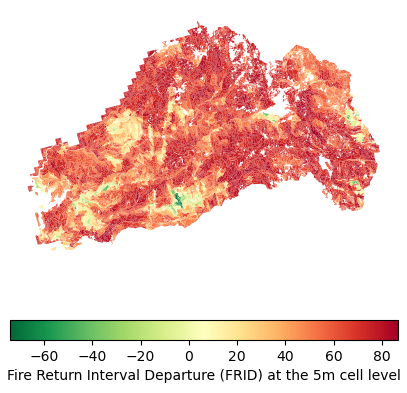

In [12]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

yuba_gpu_smpl.plot(
    column='FRID', 
    ax=ax, 
    cmap='RdYlGn_r', 
    legend=True,
    legend_kwds={'label': "Fire Return Interval Departure (FRID) at the 5m cell level",
                        'orientation': "horizontal"})

ax.set_axis_off();

### Explore the LDSim GPU data deeper by creating and symbolizing an interactive map

##### Create a map instance, add, and explore the raw LDSim GPU [GeoDataFrame](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html) data: 

**_NOTE: To explore the GPU data's attributes, hover over a polygon in the map._**

In [13]:
m = leafmap.Map(center=[39.40, -120.50], zoom=11, height=600, widescreen=False) #create the map instance

m.add_gdf(yuba_gpu_smpl, layer_name="Yuba GPU") #add the layer to the map instance

m #draw the map instance

Map(center=[39.4, -120.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

##### Review the GPU file's data dictionary to better understand the attributes of the data: 

In [10]:
gpu_data_dictionary = "https://storage.googleapis.com/way-find.com/vpdc/data/LDSim/region/Yuba/ldsim_outputs/gpuResults/documents/Yuba_gpuResults_dataDictionary.csv"
gpu_dd = pd.read_csv(gpu_data_dictionary)
gpu_dd

,LDSim Geophysical Unit (GPU) attribute definitions. See the North Sierra General Technical Report for further details.
ATTRIBUTE_NAME,DESCRIPTION
id,"""unique GPU id and used for relational table ..."
areaHa,"""GPU polygon area in hectares"""
areaAcres,"""GPU polygon area in acres"""
aspectCL,"""assigned aspect class"""
...,...
tSizeDvDI,"""tree size class diversity departure index"""
tSizeDvDSN,"""tree size class diversity negative departure..."
tSizeDvDSA,"""tree size class diversity absolute departure..."
twiCL,"""assigned topographic wetness index class"""


##### Save the Yuba GPU data dictionary csv file to your local directory to review in tandem with this notebook: 

**<span style="color:red">TODO: VERIFY THAT THE DATASET IS AVAILABLE TO OTHER USERS.</span>**

In [11]:
gpu_dd.to_csv('yuba_gpu_dataDictionary.csv')## Save the CSV file to root of local directory

### Symbolize the gpu units to match various criteria

##### Symbolize the GPU unit to show the Fire Return Interval Departure (FRID) at the 5m cell level classsified using Natural Breaks. 

In [16]:
m = leafmap.Map(
    google_map="HYBRID", 
    draw_control=False,
    measure_control=False,
    center=[39.40, -120.50],
    zoom=11,
)

m.add_data(
    yuba_gpu_smpl, column='FRID', scheme='NaturalBreaks', cmap='RdYlGn_r', legend_title='FRID (Fire Return Interval Departure)', layer_name = 'Yuba FRID', k=10
)

m


Map(center=[39.4, -120.5], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

The map above shows the FRID (Fire Return Interval Departure) classified at the GPU scale. Positive values represent a contemporary Fire Return Interval > the pre-settlement Fire Return Interval and, conversely, negative values represent a contemporary Fire Return Interval < the pre-settlement Fire Return Interval.

### Review data with Plotly graphing package

In [ ]:
yuba_gpu_smpl.to_crs(epsg=4326, inplace=True)

#gdf.set_index('id', inplace=True)
fig = px.choropleth_mapbox(gdf,
                           geojson=gdf['geometry'],
                           locations=gdf.index,
                           color='FRID',
                           color_continuous_scale="rdylgn",
                           mapbox_style="open-street-map",
                           center={'lat':39.20, 'lon':-120.50},
                           zoom=12,
                           opacity=1,
                           height=900
                          )
fig.show()